<a href="https://colab.research.google.com/github/uujimin/-Jeju_Island_Tourist_Prediction/blob/main/%EB%B9%85%EC%BD%98%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import seaborn as sns

# 데이터 불러오기

In [51]:
df = pd.read_csv('빅콘.csv')
df

,base_month,Vacation,holiday,season,weekend,Average temperature (°C),Average maximum temperature (°C),Average minimum temperature (°C),Maximum temperature (°C),Minimum temperature (°C),...,0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),leis_sports_cnt,ref_view_cnt
0,201501,1,1,winter,9,7.4,10.2,4.9,17.5,1.2,...,7.2,7.7,7.9,8.5,9.6,9.6,15.6,18.4,127063.0,521304.0
1,201502,0,3,winter,4,7.3,10.1,4.7,17.3,-0.7,...,7.3,7.5,7.6,7.8,8.0,7.7,12.2,16.9,134718.0,459032.0
2,201503,0,1,spring,8,10.4,13.6,7.3,22.2,0.2,...,11.1,10.9,10.7,10.5,9.6,8.9,11.1,15.8,143528.0,490004.0
3,201504,0,0,spring,6,15.1,19.2,12.0,27.7,7.0,...,16.2,15.9,15.6,15.4,13.7,12.6,12.1,14.9,146259.0,623087.0
4,201505,0,2,spring,10,18.8,22.7,15.9,29.4,11.0,...,21.6,21.2,20.8,20.4,18.1,16.3,14.7,14.8,179944.0,628479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,202204,0,1,spring,9,15.5,19.6,11.9,26.7,5.6,...,17.3,17.2,16.7,16.4,14.8,13.9,13.9,16.5,102377.0,843283.0
88,202205,0,2,spring,9,19.4,23.1,15.8,29.0,9.5,...,21.5,21.6,21.2,20.8,18.8,17.2,15.6,16.1,94892.0,918511.0
89,202206,1,0,summer,8,23.9,27.5,21.1,34.4,17.3,...,26.0,25.9,25.4,24.9,22.5,20.4,17.9,16.5,106281.0,970029.0
90,202207,1,1,summer,10,28.4,31.8,25.7,36.0,23.2,...,30.6,30.6,30.2,29.5,27.2,24.8,22.0,17.7,93984.0,940925.0


## 빅 콘테스트는 7월 데이터 까지 있으므로 마지막 2022년 8월 데이터는 삭제해준다.


In [52]:
#원핫이코딩을 위해서 미리 원핫인코딩을 해준다.
df = pd.get_dummies(df, columns = ['season'])
df_a = df.loc[91,:]

df = df.drop(91, axis=0)
df



,base_month,Vacation,holiday,weekend,Average temperature (°C),Average maximum temperature (°C),Average minimum temperature (°C),Maximum temperature (°C),Minimum temperature (°C),The day the highest temperature appeared (yyyymmdd),...,1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),leis_sports_cnt,ref_view_cnt,season_autumn,season_spring,season_summer,season_winter
0,201501,1,1,9,7.4,10.2,4.9,17.5,1.2,20150105,...,9.6,9.6,15.6,18.4,127063.0,521304.0,0,0,0,1
1,201502,0,3,4,7.3,10.1,4.7,17.3,-0.7,20150221,...,8.0,7.7,12.2,16.9,134718.0,459032.0,0,0,0,1
2,201503,0,1,8,10.4,13.6,7.3,22.2,0.2,20150331,...,9.6,8.9,11.1,15.8,143528.0,490004.0,0,1,0,0
3,201504,0,0,6,15.1,19.2,12.0,27.7,7.0,20150402,...,13.7,12.6,12.1,14.9,146259.0,623087.0,0,1,0,0
4,201505,0,2,10,18.8,22.7,15.9,29.4,11.0,20150514,...,18.1,16.3,14.7,14.8,179944.0,628479.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,202203,0,2,8,11.4,15.5,7.8,22.3,4.5,20220312,...,10.7,10.7,13.5,17.2,74732.0,617995.0,0,1,0,0
87,202204,0,1,9,15.5,19.6,11.9,26.7,5.6,20220425,...,14.8,13.9,13.9,16.5,102377.0,843283.0,0,1,0,0
88,202205,0,2,9,19.4,23.1,15.8,29.0,9.5,20220527,...,18.8,17.2,15.6,16.1,94892.0,918511.0,0,1,0,0
89,202206,1,0,8,23.9,27.5,21.1,34.4,17.3,20220626,...,22.5,20.4,17.9,16.5,106281.0,970029.0,0,0,1,0


In [53]:
df_a

base_month                  202209.0
Vacation                         0.0
holiday                          4.0
weekend                          8.0
Average temperature (°C)        24.1
                              ...   
ref_view_cnt                     NaN
season_autumn                    1.0
season_spring                    0.0
season_summer                    0.0
season_winter                    0.0
Name: 91, Length: 76, dtype: float64

# 전처리 과정

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 76 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   base_month                                                  91 non-null     int64  
 1   Vacation                                                    91 non-null     int64  
 2   holiday                                                     91 non-null     int64  
 3   weekend                                                     91 non-null     int64  
 4   Average temperature (°C)                                    91 non-null     float64
 5   Average maximum temperature (°C)                            91 non-null     float64
 6   Average minimum temperature (°C)                            91 non-null     float64
 7   Maximum temperature (°C)                                    91 non-null     float64
 8   Mi

## 데이터 컬럼 설명


---

|컬럼|의미|
|---|---|
|Vacation|방학|
|holiday|공휴일|
|season|계절|
|weekend|주말|
|Average temperature (°C)|평균기온(°C)|
|Average maximum temperature (°C)|평균최고기온(°C)|
|Average minimum temperature (°C)|평균최저기온(°C)|
|Maximum temperature (°C)|최고기온(°C)|
|Minimum temperature (°C)|최저기온(°C)|
|The day the highest temperature appeared (yyyymmdd)|최고기온 나타난날(yyyymmdd)|
|The day the lowest temperature appeared (yyyymmdd)|최저기온 나타난날(yyyymmdd)|
|Monthly precipitation (00~24hten thousand)(mm)|월합강수량(00~24h만)(mm))|
|Average wind speed (m/s)|평균풍속(m/s)|
|Maximum wind speed (m/s)|최대풍속(m/s)|
|The day the maximum wind speed appeared (yyyymmdd)|최대풍속 나타난날(yyyymmdd)|
|Average Cloudiness (1/10)|평균운량(1/10)|
|leis_sports_cnt|레저스포츠|
|ref_view_cnt|뷰|

## 데이터를 살펴보니 결측치가 존재하는 컬럼이 보인다.

따라서 결측치가 존재하는 컬럼을 삭제해준다

In [55]:
# 결측치가 존재하는 컬럼은 13개이다. 따라서 13개의 컬럼을 삭제해 준다.

df = df.dropna(axis=1)

## EDA 과정

본대회의 예측을 수행하기 위하여 중요하다고 생각하는 컬럼은 [Vacation, holiday, season, weekend, Average temperature (°C), Average maximum temperature (°C), Average minimum temperature (°C), Maximum temperature (°C), Minimum temperature (°C), Average wind speed (m/s)]과 같다

따라서 다음의 EDA 분석을 실시하고자 한다.


### season분석

In [56]:
# season을 분석하기 위해서 원핫인코딩을 실행한다.
# df = pd.get_dummies(df, columns = ['season'])
df

,base_month,Vacation,holiday,weekend,Average temperature (°C),Average maximum temperature (°C),Average minimum temperature (°C),Maximum temperature (°C),Minimum temperature (°C),The day the highest temperature appeared (yyyymmdd),...,1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),leis_sports_cnt,ref_view_cnt,season_autumn,season_spring,season_summer,season_winter
0,201501,1,1,9,7.4,10.2,4.9,17.5,1.2,20150105,...,9.6,9.6,15.6,18.4,127063.0,521304.0,0,0,0,1
1,201502,0,3,4,7.3,10.1,4.7,17.3,-0.7,20150221,...,8.0,7.7,12.2,16.9,134718.0,459032.0,0,0,0,1
2,201503,0,1,8,10.4,13.6,7.3,22.2,0.2,20150331,...,9.6,8.9,11.1,15.8,143528.0,490004.0,0,1,0,0
3,201504,0,0,6,15.1,19.2,12.0,27.7,7.0,20150402,...,13.7,12.6,12.1,14.9,146259.0,623087.0,0,1,0,0
4,201505,0,2,10,18.8,22.7,15.9,29.4,11.0,20150514,...,18.1,16.3,14.7,14.8,179944.0,628479.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,202203,0,2,8,11.4,15.5,7.8,22.3,4.5,20220312,...,10.7,10.7,13.5,17.2,74732.0,617995.0,0,1,0,0
87,202204,0,1,9,15.5,19.6,11.9,26.7,5.6,20220425,...,14.8,13.9,13.9,16.5,102377.0,843283.0,0,1,0,0
88,202205,0,2,9,19.4,23.1,15.8,29.0,9.5,20220527,...,18.8,17.2,15.6,16.1,94892.0,918511.0,0,1,0,0
89,202206,1,0,8,23.9,27.5,21.1,34.4,17.3,20220626,...,22.5,20.4,17.9,16.5,106281.0,970029.0,0,0,1,0


In [57]:
# 상관관계 분석을 해보니 leis_sports_cnt(spring = 0.06, summer = -0.1, autumn = 0.1, wintter = -0.02)하고는 관계가 있는 것이 없고,
# ref_view_cnt하고는 summer이 가장 관계가 깊고(0.5), winter가 그 다음으로 반비례하여 높다.(-0.3) 나머지는 상관관계가 없다.(spring = -0.1, autumn = -0.08)
df_season = df[["season_autumn","season_spring","season_summer","season_winter","leis_sports_cnt","ref_view_cnt"]]
df_season.corr()

,season_autumn,season_spring,season_summer,season_winter,leis_sports_cnt,ref_view_cnt
season_autumn,1.000000,-0.327815,-0.318544,-0.318544,0.159662,-0.082484
season_spring,-0.327815,1.000000,-0.348079,-0.348079,0.064811,-0.134630
season_summer,-0.318544,-0.348079,1.000000,-0.338235,-0.194176,0.518904
season_winter,-0.318544,-0.348079,-0.338235,1.000000,-0.026330,-0.302427
leis_sports_cnt,0.159662,0.064811,-0.194176,-0.026330,1.000000,0.087771
ref_view_cnt,-0.082484,-0.134630,0.518904,-0.302427,0.087771,1.000000


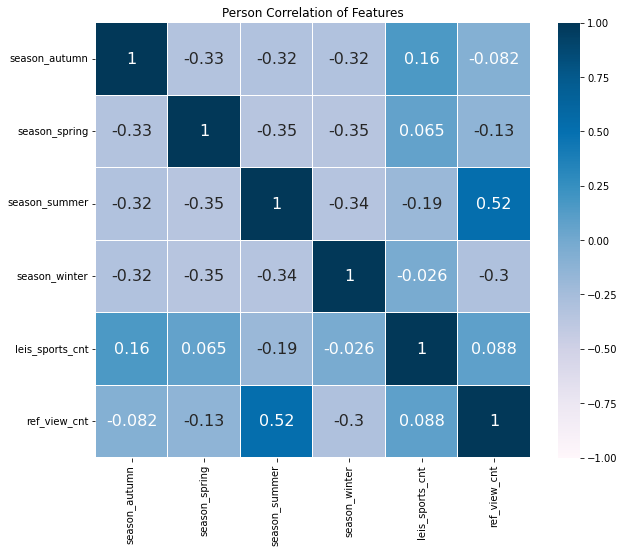

In [58]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_season.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Vacation분석

In [59]:
# 상관관계 분석을 해 보니 vacation(0.01)과 ref_view_cnt(0.3)가 상관관계가 있고,
# leis_sports_cnt(-0.1)는 상관관계가 없다.
df_vacation = df[["Vacation","leis_sports_cnt","ref_view_cnt"]]
df_vacation.corr()

,Vacation,leis_sports_cnt,ref_view_cnt
Vacation,1.000000,-0.140896,0.391629
leis_sports_cnt,-0.140896,1.000000,0.087771
ref_view_cnt,0.391629,0.087771,1.000000


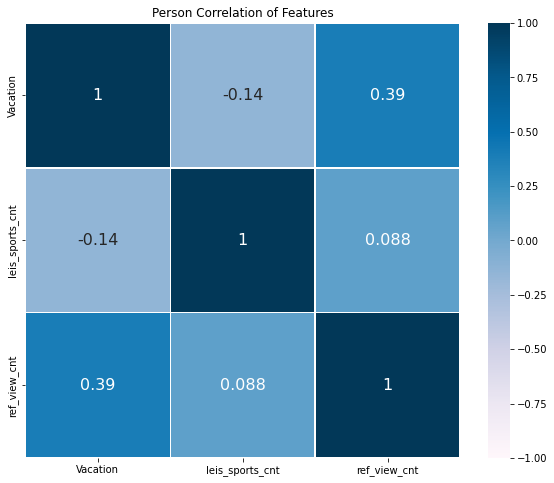

In [60]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_vacation.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### holiday분석

In [61]:
# 상관관계 분석을 해 보니 holiday와 leis_sports_cnt(0.003), 
# ref_view_cnt(-0.08) 둘 다 관계가 없다.
df_holiday = df[["holiday","leis_sports_cnt","ref_view_cnt"]]
df_holiday.corr()

,holiday,leis_sports_cnt,ref_view_cnt
holiday,1.000000,0.003873,-0.083187
leis_sports_cnt,0.003873,1.000000,0.087771
ref_view_cnt,-0.083187,0.087771,1.000000


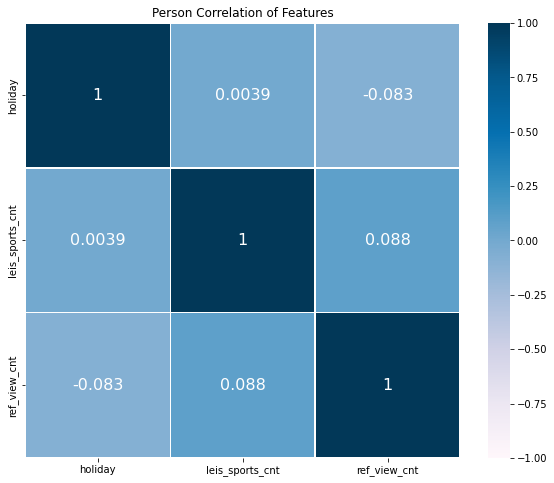

In [62]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_holiday.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### weekend분석

In [63]:
# 상관관계 분석을 해 보니 weekend와 leis_sports_cnt(0.01), 
# ref_view_cnt(0.2) 둘 다 관계가 없다.
df_weekend = df[["weekend","leis_sports_cnt","ref_view_cnt"]]
df_weekend.corr()

,weekend,leis_sports_cnt,ref_view_cnt
weekend,1.000000,0.015566,0.202462
leis_sports_cnt,0.015566,1.000000,0.087771
ref_view_cnt,0.202462,0.087771,1.000000


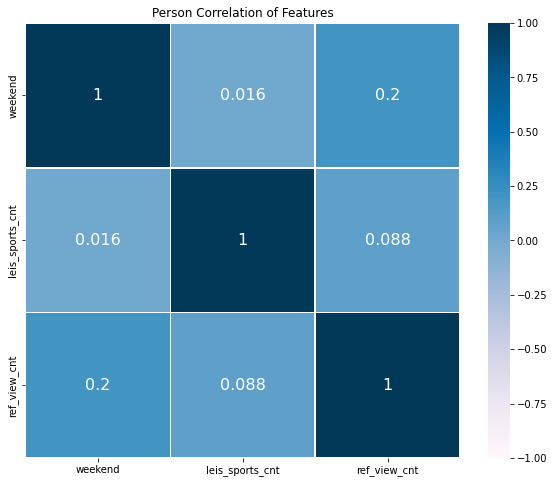

In [64]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_weekend.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Average temperature (°C)분석

In [65]:
# 상관관계 분석을 해 보니 Average temperature (°C)와 leis_sports_cnt(0.5), 
# ref_view_cnt(0.5) 둘 다 관계가 깊다.
df_Average_temperature = df[["Average temperature (°C)","leis_sports_cnt","ref_view_cnt"]]
df_Average_temperature.corr()

,Average temperature (°C),leis_sports_cnt,ref_view_cnt
Average temperature (°C),1.000000,-0.178488,0.552147
leis_sports_cnt,-0.178488,1.000000,0.087771
ref_view_cnt,0.552147,0.087771,1.000000


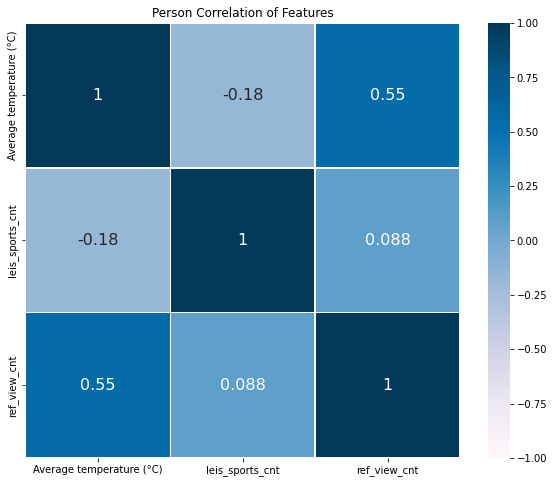

In [66]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Average_temperature.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Average maximum temperature (°C)분석

In [67]:
# 상관관계 분석을 해 보니 Average maximum temperature (°C)와 leis_sports_cnt(-0.1)는 관계가 없고, 
# ref_view_cnt(0.5)하고는 관계가 깊다.
df_Average_maximum_temperature = df[["Average maximum temperature (°C)","leis_sports_cnt","ref_view_cnt"]]
df_Average_maximum_temperature.corr()

,Average maximum temperature (°C),leis_sports_cnt,ref_view_cnt
Average maximum temperature (°C),1.000000,-0.174064,0.551348
leis_sports_cnt,-0.174064,1.000000,0.087771
ref_view_cnt,0.551348,0.087771,1.000000


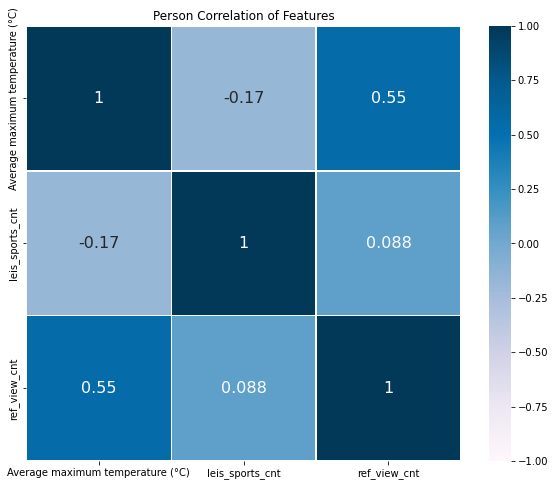

In [68]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Average_maximum_temperature.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Average minimum temperature (°C)분석

In [69]:
# 상관관계 분석을 해 보니 Average minimum temperature (°C)와 leis_sports_cnt(-0.1)는 상관관계가 없고,
# ref_view_cnt(0.5)는 상관관계가 깊다.
df_Average_minimum_temperature = df[["Average minimum temperature (°C)","leis_sports_cnt","ref_view_cnt"]]
df_Average_minimum_temperature.corr()

,Average minimum temperature (°C),leis_sports_cnt,ref_view_cnt
Average minimum temperature (°C),1.000000,-0.177321,0.554835
leis_sports_cnt,-0.177321,1.000000,0.087771
ref_view_cnt,0.554835,0.087771,1.000000


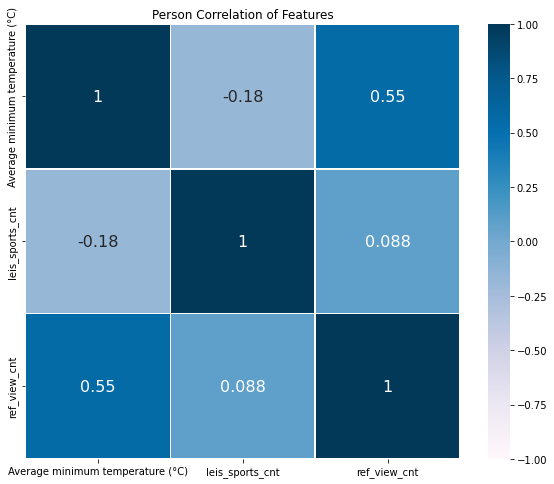

In [70]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Average_minimum_temperature.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Maximum temperature (°C)분석

In [71]:
# 상관관계 분석을 해 보니 Maximum temperature (°C)와 leis_sports_cnt(-0.1)는 상관관계가 없고,
# ref_view_cnt(0.5)는 상관관계가 깊다.
df_Maximum_traturempee = df[["Maximum temperature (°C)","leis_sports_cnt","ref_view_cnt"]]
df_Maximum_traturempee.corr()

,Maximum temperature (°C),leis_sports_cnt,ref_view_cnt
Maximum temperature (°C),1.000000,-0.165561,0.500803
leis_sports_cnt,-0.165561,1.000000,0.087771
ref_view_cnt,0.500803,0.087771,1.000000


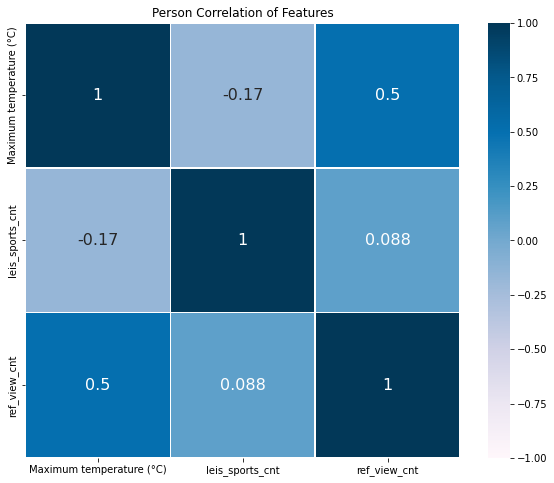

In [72]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Maximum_traturempee.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Minimum temperature (°C)분석

In [73]:
# 상관관계 분석을 해 보니 Minimum temperature (°C)와 leis_sports_cnt(-0.2)는 상관관계가 없고,
# ref_view_cnt(0.5)는 상관관계가 깊다.
df_Minimum_traturempee = df[["Minimum temperature (°C)","leis_sports_cnt","ref_view_cnt"]]
df_Minimum_traturempee.corr()

,Minimum temperature (°C),leis_sports_cnt,ref_view_cnt
Minimum temperature (°C),1.000000,-0.207130,0.582554
leis_sports_cnt,-0.207130,1.000000,0.087771
ref_view_cnt,0.582554,0.087771,1.000000


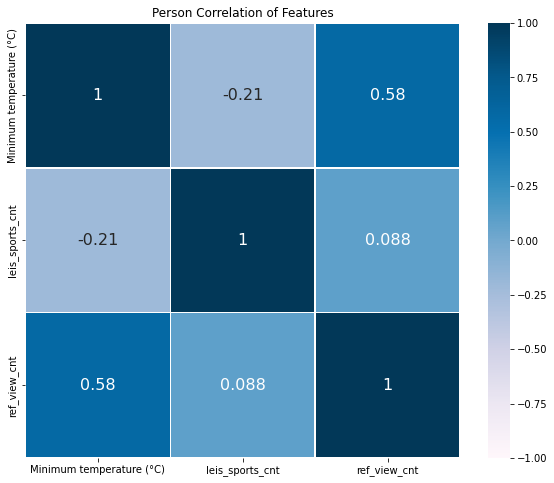

In [74]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Minimum_traturempee.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### Average wind speed (m/s)분석

In [75]:
# 상관관계 분석을 해 보니 Average wind speed (m/s)와 leis_sports_cnt(0.04)는 상관관계가 없고,
# ref_view_cnt(-0.3)는 상관관계가 있다.
df_Average_wind_speed = df[["Average wind speed (m/s)","leis_sports_cnt","ref_view_cnt"]]
df_Average_wind_speed.corr()

,Average wind speed (m/s),leis_sports_cnt,ref_view_cnt
Average wind speed (m/s),1.000000,0.048449,-0.367868
leis_sports_cnt,0.048449,1.000000,0.087771
ref_view_cnt,-0.367868,0.087771,1.000000


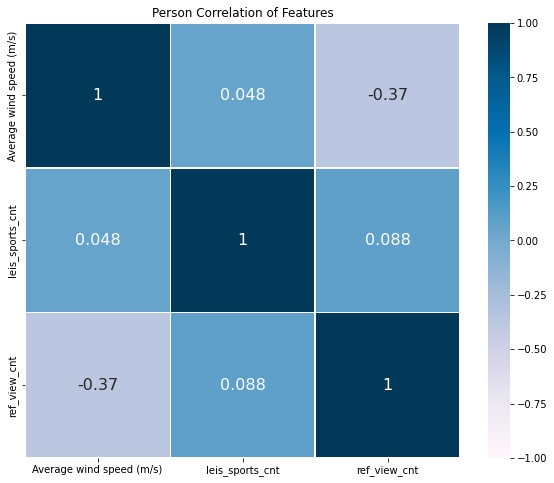

In [76]:
# heatmap by plt.pcolor()
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features")
sns.heatmap(df_Average_wind_speed.corr(), linewidths = 0.1, vmax = 1.0,vmin = -1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 데이터프레임 전체 상관관계 분석

In [77]:
df_Average_wind_speed = df
df_Average_wind_speed.corr()

,base_month,Vacation,holiday,weekend,Average temperature (°C),Average maximum temperature (°C),Average minimum temperature (°C),Maximum temperature (°C),Minimum temperature (°C),The day the highest temperature appeared (yyyymmdd),...,1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),leis_sports_cnt,ref_view_cnt,season_autumn,season_spring,season_summer,season_winter
base_month,1.000000,0.023100,0.025016,0.149322,0.000328,0.016248,-0.011081,0.006681,0.003920,1.000000,...,0.026306,0.036386,0.051171,0.124491,-0.292757,0.146686,-0.067584,0.046156,0.012356,0.006364
Vacation,0.023100,1.000000,-0.185762,0.147970,0.396794,0.373742,0.420457,0.327304,0.438528,0.023186,...,0.361367,0.311813,0.266405,-0.126867,-0.140896,0.391629,-0.393700,-0.430203,0.809104,0.008795
holiday,0.025016,-0.185762,1.000000,-0.044243,-0.095213,-0.109355,-0.086330,-0.093950,-0.085188,0.024915,...,-0.057117,-0.030686,0.030656,0.161303,0.003873,-0.083187,0.181737,-0.051248,-0.302245,0.178018
weekend,0.149322,0.147970,-0.044243,1.000000,0.163353,0.165784,0.164281,0.182217,0.140468,0.149336,...,0.198655,0.200422,0.205316,0.112462,0.015566,0.202462,0.026480,-0.018084,0.073348,-0.080683
Average temperature (°C),0.000328,0.396794,-0.095213,0.163353,1.000000,0.997560,0.998425,0.957180,0.981291,0.000305,...,0.951479,0.905394,0.651429,0.001501,-0.178488,0.552147,0.168687,-0.136271,0.714419,-0.739784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ref_view_cnt,0.146686,0.391629,-0.083187,0.202462,0.552147,0.551348,0.554835,0.500803,0.582554,0.146713,...,0.531603,0.495269,0.369444,-0.026825,0.087771,1.000000,-0.082484,-0.134630,0.518904,-0.302427
season_autumn,-0.067584,-0.393700,0.181737,0.026480,0.168687,0.151736,0.175711,0.109319,0.151312,-0.067798,...,0.354988,0.451064,0.588383,0.723226,0.159662,-0.082484,1.000000,-0.327815,-0.318544,-0.318544
season_spring,0.046156,-0.430203,-0.051248,-0.018084,-0.136271,-0.087078,-0.175829,-0.032781,-0.179921,0.046240,...,-0.330565,-0.394063,-0.655009,-0.647116,0.064811,-0.134630,-0.327815,1.000000,-0.348079,-0.348079
season_summer,0.012356,0.809104,-0.302245,0.073348,0.714419,0.704905,0.724044,0.664608,0.732497,0.012460,...,0.639045,0.571177,0.391630,-0.200511,-0.194176,0.518904,-0.318544,-0.348079,1.000000,-0.338235


In [78]:
# ref_view_cnt를 예측하기 위해서 필요한 10가지 컬럼을 뽑아보았다.
corr_df = df.corr()

corr5 = corr_df.nlargest(11, 'ref_view_cnt')
corr5 = corr5[list(corr5.index)]
corr5['ref_view_cnt']

ref_view_cnt                        1.000000
Minimum temperature (°C)            0.582554
평균지면온도(°C)                          0.559266
Average minimum temperature (°C)    0.554835
0.3m평균지중온도(°C)                      0.554146
최저초상온도(°C)                          0.553892
Average temperature (°C)            0.552147
소형총증발량(mm)                          0.551732
Average maximum temperature (°C)    0.551348
평균수증기압(hPa)                         0.550602
0.05m평균지중온도(°C)                     0.550031
Name: ref_view_cnt, dtype: float64

In [79]:
# leis_sports_cnt 예측하기 위해서 필요한 10가지 컬럼을 뽑아보았다.
corr_df = df.drop(['ref_view_cnt'],axis =1).corr()

corr6 = corr_df.nlargest(11, 'leis_sports_cnt')
corr6 = corr6[list(corr6.index)]
corr6['leis_sports_cnt']

leis_sports_cnt             1.000000
평균현지기압(hPa)                 0.226816
평균해면기압(hPa)                 0.225545
최고해면기압(hPa)                 0.213945
최저해면기압(hPa)                 0.212689
최다풍향(16방위)                  0.191526
season_autumn               0.159662
최대순간풍속 풍향(16방위)             0.081648
season_spring               0.064811
Average wind speed (m/s)    0.048449
최대풍속 풍향(16방위)               0.033766
Name: leis_sports_cnt, dtype: float64

# ref_view_cnt 예측모델

In [80]:
# ref_view_cnt와 상관관계가 높은 10개의 컬럼
col =  corr5.columns[1:]
target = 'ref_view_cnt'

# feature, target 데이터 분리
X_data = df[col]
y_target = df[target]

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=47)

# Linear Regression
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습
lr.fit(X_train, y_train)

print(X_train.shape, X_test.shape)
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')

(63, 10) (28, 10)
MSE : 17931821106.031, RMSE: 133909.750


In [81]:
# 9월 예측을 위한 데이터 전처리
df_b = pd.DataFrame(df_a[col])
df_b = df_b.transpose()
df_b = df_b.dropna(axis=1)

In [82]:
#9월의 내국인 관광목적 예측 입도객 수(ref_view_cnt)
lr.predict(df_b.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([931431.89585749])

# leis_sports_cnt 예측모델

In [83]:
# 상관관계가 높은 10개의 컬럼
col =  corr6.columns[1:]
target = 'leis_sports_cnt'

# feature, target 데이터 분리
X_data = df[col]
y_target = df[target]

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=47)

# Linear Regression
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습
lr.fit(X_train, y_train)

print(X_train.shape, X_test.shape)
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')

(63, 10) (28, 10)
MSE : 3069135749.297, RMSE: 55399.781


In [84]:
# 9월 예측을 위한 데이터 전처리
df_c = pd.DataFrame(df_a[col])
df_c = df_c.transpose()
df_c = df_c.dropna(axis=1)
df_c

,평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최다풍향(16방위),season_autumn,최대순간풍속 풍향(16방위),season_spring,Average wind speed (m/s),최대풍속 풍향(16방위)
91,1009.3,1011.7,1018.7,974.8,70.0,1.0,340.0,0.0,3.4,20.0


In [85]:
#9월의 내국인 레저 스포츠목적 예측 입도객 수(leis_sports_cnt)
lr.predict(df_c[col].values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([104321.38399022])

In [86]:
import matplotlib.pyplot as plt

import seaborn as sns

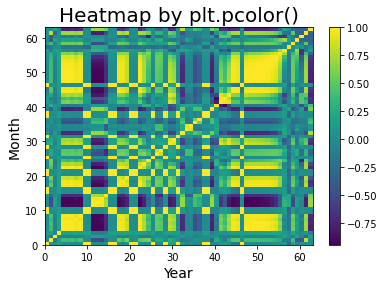

In [87]:
# heatmap by plt.pcolor()
plt.pcolor(df.corr())
plt.title('Heatmap by plt.pcolor()', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()